In [10]:
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns

In [48]:
def knn(X,y,u,k):
    """Classifies by K nearest training object

    Keyword arguments:
    X -- training sample
    y -- classes of training samples
    u -- object to classify
    k -- number of near object to classify
    """
    p = [(x[0]-u[0])**2 + (x[1]-u[1])**2 for x in X]
    p,y = zip(*sorted(zip(p, y)))
    l = []
    for i in range(0,k):
        l.append(y[i])
    u, c = np.unique(l, return_counts=True)
    return u[np.argmax(c)]


def loo_for_knn(X,y):
    """Finds k for knn, where error is minimum

    Keyword arguments:
    X -- training sample
    y -- classes of training samples
    """
    diff = len(X)
    gk = 0
    kvarray = []
    u = [[],0]
    for k in range(1,len(X)):
        cd = 0
        for i in range(1,len(X)):
            u[0] = X[i]
            u[1] = y[i]
            Xt = np.delete(X,i,0)
            yt = np.delete(y,i)
            if(knn(Xt,yt,u[0],k)!=u[1]):
                cd = cd+1
        if(diff>cd):
            diff = cd
            gk = k
        kvarray.append(cd)
    return gk-1,kvarray

In [49]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [50]:
gk,ga = loo_for_knn(X,y)
print(gk)

30


[44, 43, 36, 44, 38, 32, 37, 33, 32, 34, 32, 34, 33, 34, 33, 39, 31, 33, 34, 33, 34, 32, 32, 32, 31, 32, 31, 30, 28, 27, 26, 28, 30, 32, 28, 28, 28, 29, 30, 31, 32, 32, 31, 31, 30, 29, 28, 27, 26, 27, 27, 29, 30, 28, 28, 29, 31, 31, 32, 33, 33, 31, 34, 32, 33, 33, 32, 32, 33, 34, 33, 34, 33, 35, 34, 37, 38, 37, 35, 37, 37, 36, 37, 37, 38, 36, 35, 37, 40, 42, 43, 43, 39, 41, 45, 40, 41, 45, 44, 44, 44, 44, 44, 44, 41, 41, 42, 42, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 46, 47, 48, 48, 48, 49, 52, 50, 51, 56, 59, 50, 56, 57, 59, 62, 64, 116, 118, 124, 130, 133, 136, 139, 139, 138, 144, 149, 149, 149]
26


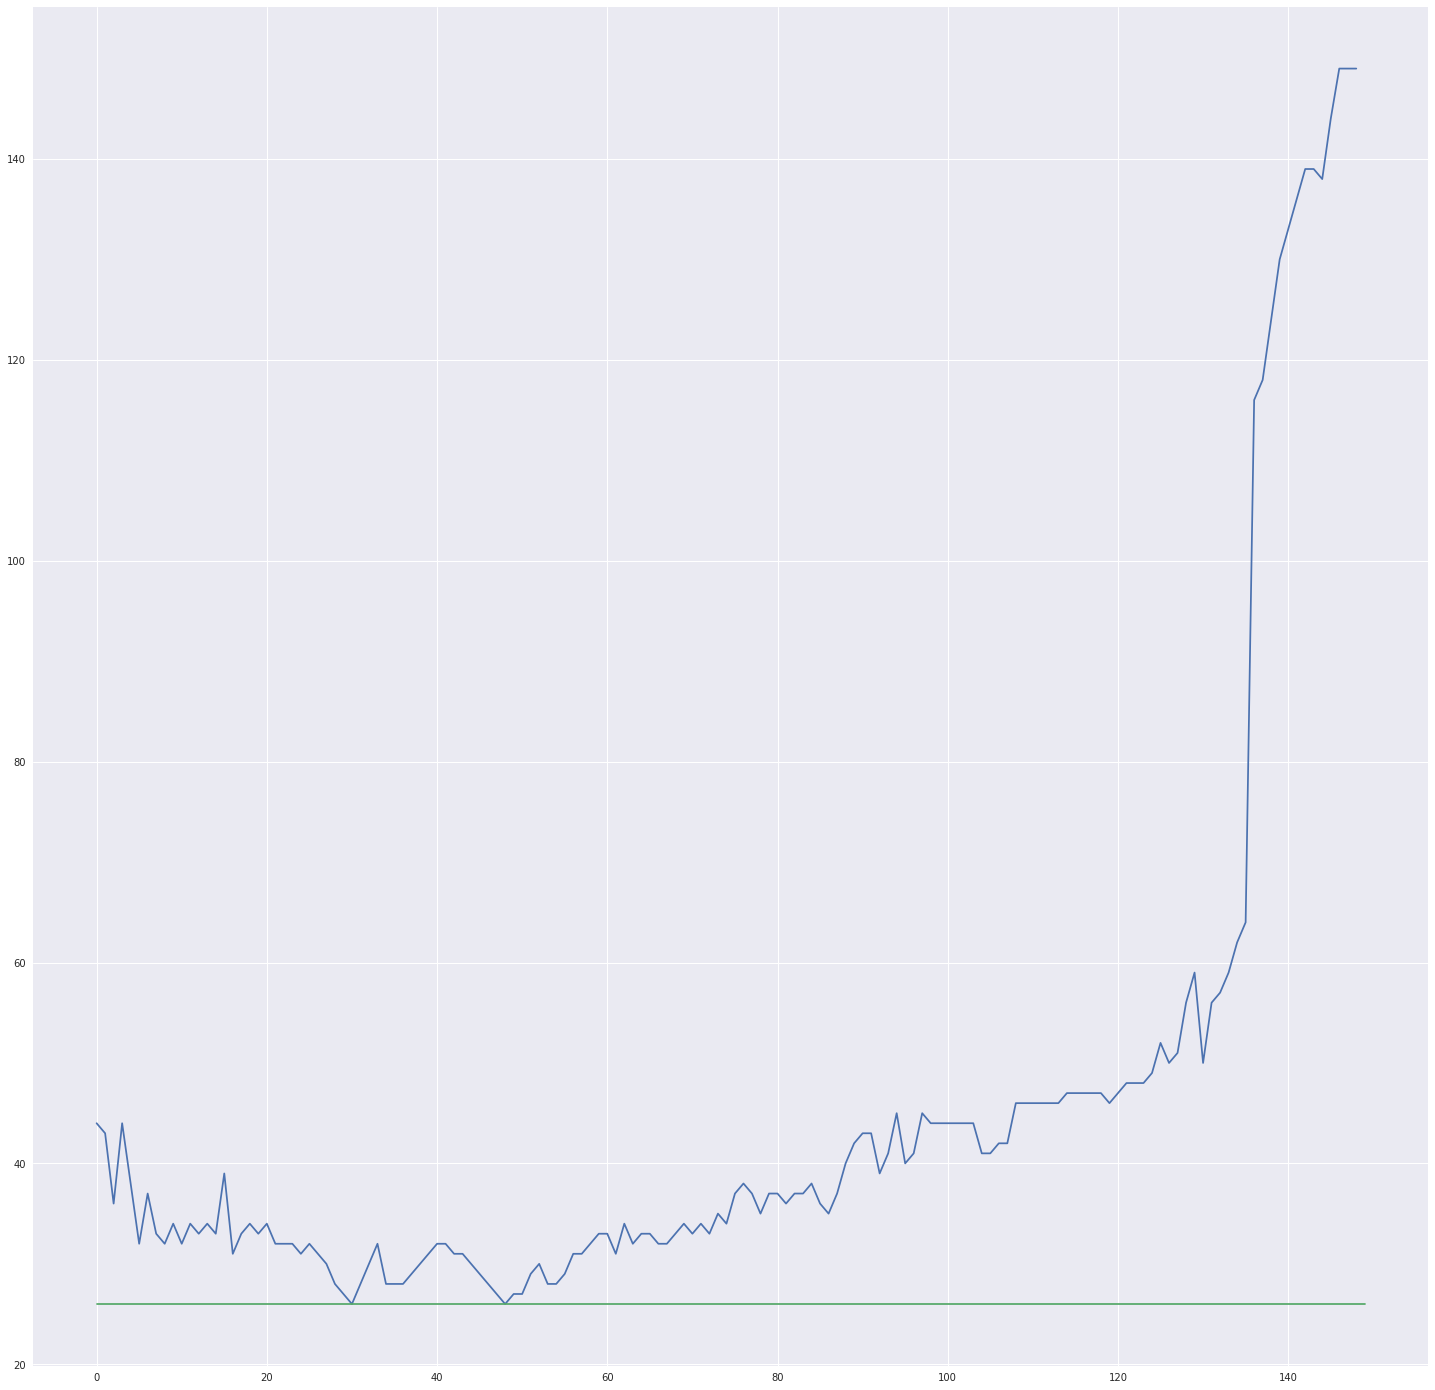

In [51]:
print(ga)
print(ga[gk])
xt = np.random.normal(size=100)
#print(xt)

plt.figure(figsize=(25,25))
plt.plot(ga)
plt.plot([0,len(ga)],[ga[gk],ga[gk]])

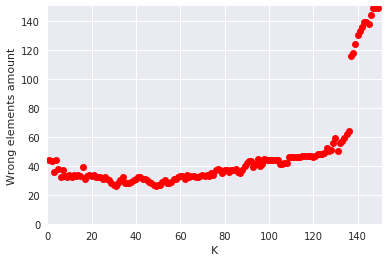

In [52]:
plt.plot([x for x in range(1,len(X))], ga, 'ro')
plt.axis([0, len(X)+1, 0, ga[np.argmax(ga)]+1])
plt.xlabel("K")
plt.ylabel("Wrong elements amount")
plt.show()

In [53]:
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array([knn(X,y,u,31) for u in  np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

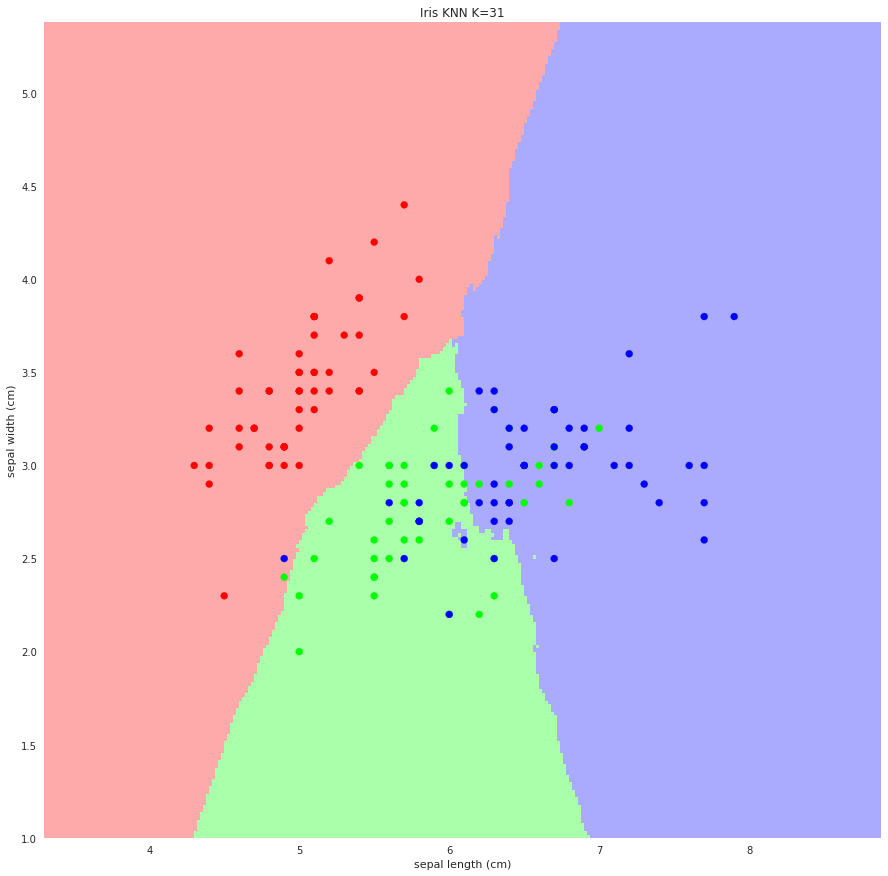

In [54]:
plt.figure(figsize=(15,15))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:,0],X[:,1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris KNN K=31")
plt.show()